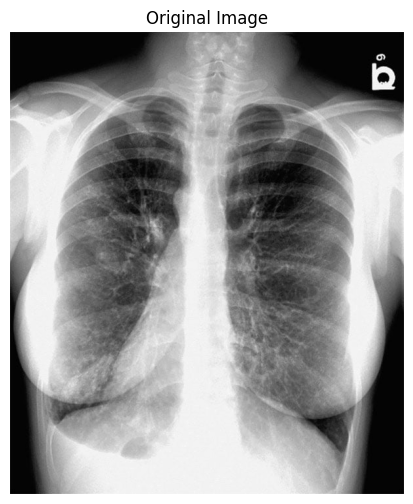

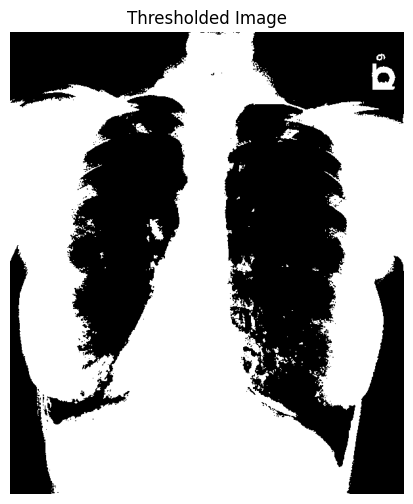

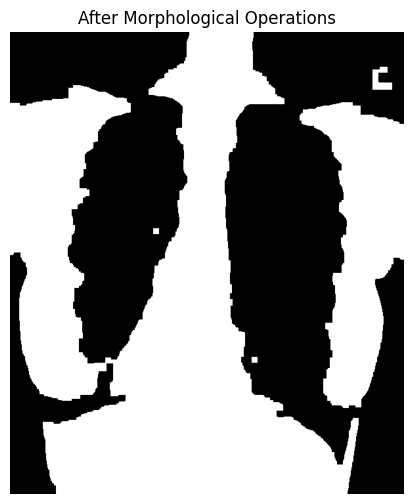

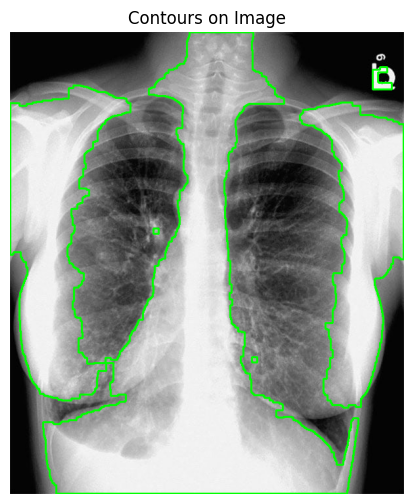

Region 1: Area = 64.0, Perimeter = 32.0
Region 2: Area = 64.0, Perimeter = 32.0
Region 3: Area = 39116.0, Perimeter = 1315.3868634700775
Region 4: Area = 553.0, Perimeter = 151.65685415267944
Region 5: Area = 172991.0, Perimeter = 4224.930142760277


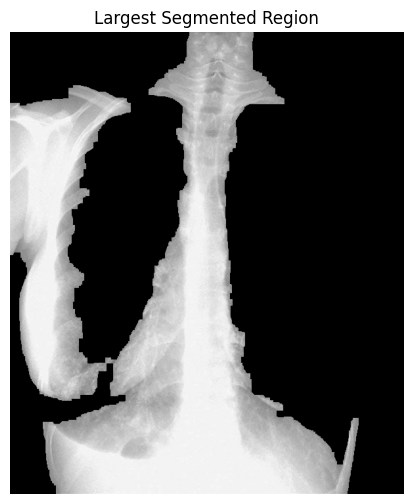

In [2]:
# Experiment 4: Apply Analytics/Segmentation on Biomedical Images

# 1. Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Load biomedical image
# Replace 'image_path' with your biomedical image file (X-ray, MRI, etc.)
image_path = 'image.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 3. Display original image
plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# 4. Apply Thresholding to segment region of interest
# Otsu's thresholding automatically determines optimal threshold
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(6,6))
plt.title("Thresholded Image")
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

# 5. Apply Morphological Operations to remove noise and fill gaps
kernel = np.ones((5,5), np.uint8)

# Remove small white noises
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Fill small holes
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.figure(figsize=(6,6))
plt.title("After Morphological Operations")
plt.imshow(closing, cmap='gray')
plt.axis('off')
plt.show()

# 6. Find Contours of segmented regions
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on original image (for visualization)
img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)

plt.figure(figsize=(6,6))
plt.title("Contours on Image")
plt.imshow(img_contours)
plt.axis('off')
plt.show()

# 7. Region Analysis - Compute area and perimeter of each contour
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    print(f"Region {i+1}: Area = {area}, Perimeter = {perimeter}")

# 8. Optional: Highlight largest segmented region
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(img)
    cv2.drawContours(mask, [largest_contour], -1, 255, -1)  # Fill the largest contour
    highlighted = cv2.bitwise_and(img, img, mask=mask)

    plt.figure(figsize=(6,6))
    plt.title("Largest Segmented Region")
    plt.imshow(highlighted, cmap='gray')
    plt.axis('off')
    plt.show()
